# Heart Disease Risk Analysis Data - Model Training

### Process the data

- Load the data/2020/heart_2020_processed.csv
- Process the features
  - Set the categorical features names
  - Set the numeric features names  
  - Set the target variable
- Split the data
  - train/validation/test split with 60%/20%/20% distribution.
  - Random_state 42
  - Use strategy = y to deal with the class imbalanced problem
- Train the model
  - LogisticRegression
  - RandomForestClassifier
  - XGBClassifier
  - DecisionTreeClassifier
- Evaluate the models and compare them
  - accuracy_score
  - precision_score
  - recall_score
  - f1_score
- Confusion Matrix


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Initialize the HeartDiseaseFactory and HeartDiseaseTrainData class
from heart_disease_model_factory import HeartDiseaseTrainData, HeartDiseaseModelFactory



In [2]:
# open the csv file and read it into a pandas dataframe to understand the data
df_source = pd.read_csv('./data/2020/heart_2020_processed.csv', sep=',', quotechar='"')

# save the original set of data
df = df_source.copy()

df.head()

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,0,16,1,0,0,3,30,0,Female,55-59,White,Yes,1,Very good,5,1,0,1
1,0,20,0,0,1,0,0,0,Female,80 or older,White,No,1,Very good,7,0,0,0
2,0,26,1,0,0,20,30,0,Male,65-69,White,Yes,1,Fair,8,1,0,0
3,0,24,0,0,0,0,0,0,Female,75-79,White,No,0,Good,6,0,0,1
4,0,23,0,0,0,28,0,1,Female,40-44,White,No,1,Very good,8,0,0,0


In [3]:
# Process the features

# set the target feature
target = 'heartdisease'

train_data = HeartDiseaseTrainData(df, target)
cat_features, num_features = train_data.process_features()


Categorical features ['sex', 'agecategory', 'race', 'diabetic', 'genhealth']
Numerical features ['bmi', 'smoking', 'alcoholdrinking', 'stroke', 'physicalhealth', 'mentalhealth', 'diffwalking', 'physicalactivity', 'sleeptime', 'asthma', 'kidneydisease', 'skincancer']
Target feature heartdisease


In [4]:
# split the data in train/val/test sets
# use 60%/20%/20% distribution with seed 1
# use stratified sampling to ensure the distribution of the target feature is the same in all sets
X_train, X_val, y_train, y_val, X_test, y_test = train_data.split_data(test_size=0.2, random_state=42)

print(X_val.head())

X_train shape (181029, 17)
X_val shape (60344, 17)
X_test shape (60344, 17)
y_train shape (181029,)
y_val shape (60344,)
y_test shape (60344,)
      sex  agecategory   race diabetic  genhealth  bmi  smoking  \
0  Female  80 or older  White       No  Excellent   19        1   
1    Male        30-34  White       No  Very good   23        1   
2    Male        25-29  White       No  Very good   30        1   
3    Male        65-69  White       No  Excellent   31        1   
4    Male        70-74  White       No       Fair   22        1   

   alcoholdrinking  stroke  physicalhealth  mentalhealth  diffwalking  \
0                0       0               0             0            0   
1                0       0               0            15            0   
2                1       0               0             0            0   
3                0       0               0             0            0   
4                0       0              20             0            1   

   physicalacti

In [5]:
# hot encode the categorical features for the train data
model_factory = HeartDiseaseModelFactory(cat_features, num_features)
X_train_std = model_factory.preprocess_data(X_train[cat_features + num_features], True)

# hot encode the categorical features for the validation data
X_val_std = model_factory.preprocess_data(X_val[cat_features + num_features], False)


In [6]:
# Train the models
model_factory.train(X_train_std, y_train)


Training model logistic_regression
Training model random_forest
Training model xgboost
Training model decision_tree


In [7]:
# Evaluate the model
df_metrics = model_factory.evaluate(X_val_std, y_val)
df_metrics.head()


,model,accuracy,precision,recall,f1,y_pred
0,logistic_regression,0.909668,0.508954,0.098720,0.165365,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,random_forest,0.909502,0.695652,0.002925,0.005826,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,xgboost,0.909883,0.515385,0.097989,0.164670,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,decision_tree,0.909734,0.519658,0.055576,0.100413,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
df_metrics[['model','accuracy', 'precision', 'recall', 'f1']].head()

,model,accuracy,precision,recall,f1
0,logistic_regression,0.909668,0.508954,0.098720,0.165365
1,random_forest,0.909502,0.695652,0.002925,0.005826
2,xgboost,0.909883,0.515385,0.097989,0.164670
3,decision_tree,0.909734,0.519658,0.055576,0.100413


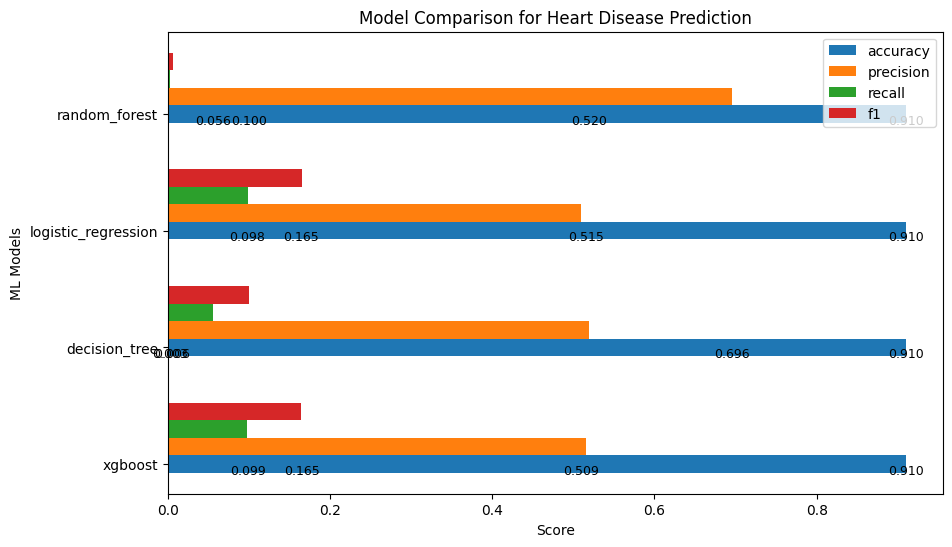

In [10]:
# plot df_metrics with the model name on the y-axis and metrics on the x-axis for all models and all metrics
# Sort the DataFrame by a metric (e.g., accuracy) to display the best-performing models at the top
df_metrics.sort_values(by='accuracy', ascending=False, inplace=True)
# Define the models, metrics, and corresponding scores
models = df_metrics['model']
metrics =['accuracy', 'precision', 'recall', 'f1']
scores = df_metrics[['accuracy', 'precision', 'recall', 'f1']]

# Set the positions for the models
model_positions = np.arange(len(models))

# Define the width of each bar group
bar_width = 0.15

# Create a grouped bar chart
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.barh(model_positions + i * bar_width, scores[metric.lower()], bar_width, label=metric)

      # Add score labels over the bars
    for index, row in df_metrics.iterrows():
        score = row[metric.lower()]
        plt.text(score, index, f'{score:.3f}', va='top', ha='center', fontsize=9)

# Customize the chart
plt.yticks(model_positions, models)
plt.xlabel('Score')
plt.ylabel('ML Models')
plt.title('Model Comparison for Heart Disease Prediction')
plt.legend(loc='upper right')

plt.savefig('./images/ozkary-ml-heart-disease-model-evaluation.png')
# Display the chart
# plt.show()



## Confusion Matrix Analysis

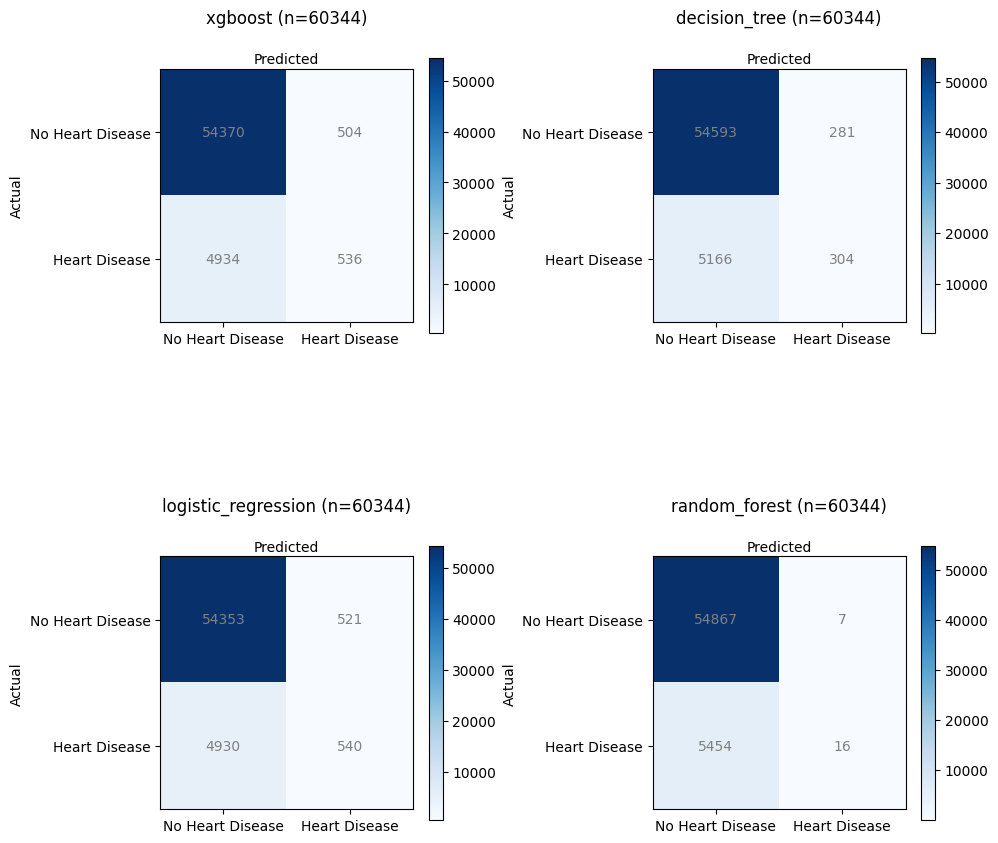

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cms = []
model_names = []
total_samples = []

for model_name in df_metrics['model']:
    model_y_pred = df_metrics[df_metrics['model'] == model_name]['y_pred'].iloc[0]

    # Compute the confusion matrix
    cm = confusion_matrix(y_val, model_y_pred)    
    cms.append(cm)
    model_names.append(model_name)
    total_samples.append(np.sum(cm))    

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the subplots and plot the confusion matrices
for i, ax in enumerate(axes.flat):
    cm = cms[i]    
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax, shrink=0.6)
    
    # Set labels, title, and value in the center of the heatmap
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), 
           xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"],
           title=f'{model_names[i]} (n={total_samples[i]})\n')

    # Loop to annotate each quadrant with its count
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="gray")
            
    ax.title.set_fontsize(12)
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_ylabel('Actual', fontsize=10)
    ax.xaxis.set_label_position('top')

# Adjust the layout
plt.tight_layout()

plt.savefig('./images/ozkary-ml-heart-disease-model-confusion-matrix.png')
# plt.show()



In [12]:
# get the metrics grid with total samples for confusion matrix analysis
scores = df_metrics[['model','accuracy', 'precision', 'recall', 'f1']] 
scores['total'] = total_samples

scores.head()

print(cms)

[array([[54370,   504],
       [ 4934,   536]]), array([[54593,   281],
       [ 5166,   304]]), array([[54353,   521],
       [ 4930,   540]]), array([[54867,     7],
       [ 5454,    16]])]


## Save the model

- Save the best performing model
- Save the encoder

In [18]:
# get the model and the dictionary vectorizer
model = model_factory.models[model_name]
encoder = model_factory.encoder

# Save the XGBoost model to a file
xgb_model_filename = './bin/hd_xgboost_model.pkl.bin'
with open(xgb_model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the DictVectorizer to a file
dv_filename = './bin/hd_dictvectorizer.pkl.bin'
with open(dv_filename, 'wb') as dv_file:
    pickle.dump(encoder, dv_file)


In [1]:
# Export this file to python code
!jupyter nbconvert --to script data_train.ipynb


/usr/bin/jupyter:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
[NbConvertApp] Converting notebook data_train.ipynb to script
[NbConvertApp] Writing 6237 bytes to data_train.py
